In [86]:
#import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Display full columns
pd.set_option('display.max_columns', None)

#Load Dataset
df = pd.read_csv("startup_funding.csv")

df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [87]:
#2️⃣ Basic Data Understanding

df.drop(columns=['Sr No', 'Remarks'], inplace=True)
df['Industry Vertical'] = df['Industry Vertical'].fillna('Unknown')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['Amount in USD'] = df['Amount in USD'].fillna('Not Specified')
df['City  Location'] = df['City  Location'].str.strip()

df['City  Location'] = df['City  Location'].fillna('Unknown')
df['Investors Name'] = df['Investors Name'].fillna('Undisclosed')
df['InvestmentnType'] = df['InvestmentnType'].fillna('Unknown')



In [88]:
df = df.dropna(subset=['Amount in USD'])
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  3044 non-null   object
 3   SubVertical        3044 non-null   object
 4   City  Location     3044 non-null   object
 5   Investors Name     3044 non-null   object
 6   InvestmentnType    3044 non-null   object
 7   Amount in USD      3044 non-null   object
dtypes: object(8)
memory usage: 190.4+ KB


Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

In [94]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['date_dd/mm/yyyy', 'startup_name', 'industry_vertical', 'subvertical',
       'city__location', 'investors_name', 'investmentntype', 'amount_in_usd',
       'year', 'month'],
      dtype='object')


In [95]:
# Remove commas and dollar signs
df['amount_in_usd'] = (
    df['amount_in_usd']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.strip()
)

# Convert to numeric safely
df['amount_in_usd'] = df['amount_in_usd'].fillna('Not Specified')


In [96]:
#Convert Date Column
date_col = [col for col in df.columns if 'date' in col.lower()][0]

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

df['year'] = df[date_col].dt.year
df['month'] = df[date_col].dt.month


In [ ]:


df=df.rename(columns={
    'city__location':'city_location',
    'date_dd/mm/yyyy':'date'
})
df['city_location'] = df['city_location'].replace({
    'Bangalore': 'Bangalore',
    'Bengaluru': 'Bangalore'
})
df = df.dropna(subset=['year'])
df = df.dropna(subset=['month'])


print(df.columns)

df['amount_in_usd'] = df['amount_in_usd'].fillna('Notspecified')


Index(['date', 'startup_name', 'industry_vertical', 'subvertical',
       'city_location', 'investors_name', 'investmentntype', 'amount_in_usd',
       'year', 'month'],
      dtype='object')


In [100]:
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1292 entries, 0 to 3008
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1292 non-null   datetime64[ns]
 1   startup_name       1292 non-null   object        
 2   industry_vertical  1292 non-null   object        
 3   subvertical        1292 non-null   object        
 4   city_location      1292 non-null   object        
 5   investors_name     1292 non-null   object        
 6   investmentntype    1292 non-null   object        
 7   amount_in_usd      887 non-null    float64       
 8   year               1292 non-null   float64       
 9   month              1292 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 111.0+ KB


date                   0
startup_name           0
industry_vertical      0
subvertical            0
city_location          0
investors_name         0
investmentntype        0
amount_in_usd        405
year                   0
month                  0
dtype: int64

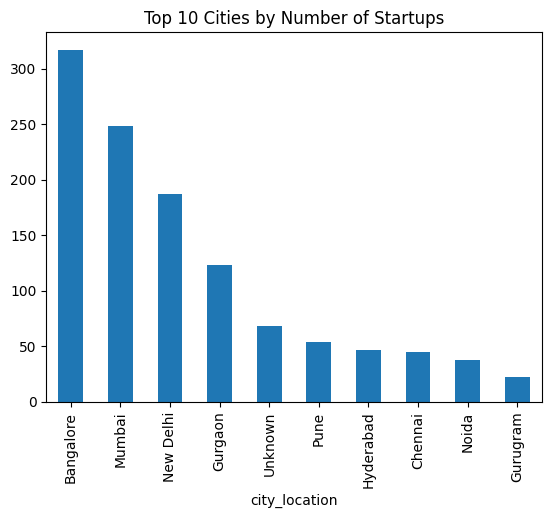

In [101]:
plt.figure()
df['city_location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities by Number of Startups")
plt.show()


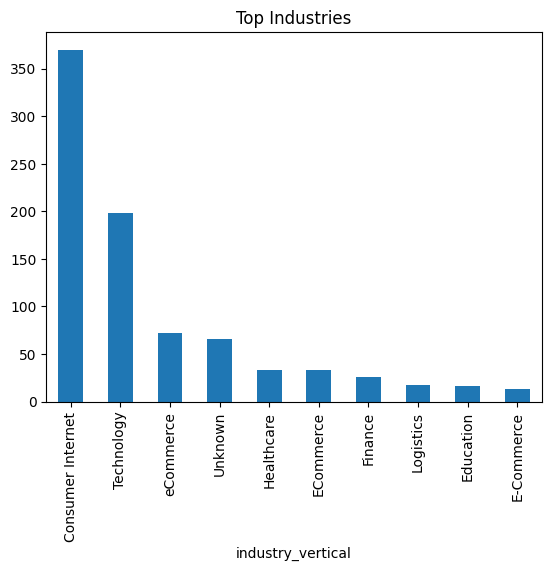

In [102]:
plt.figure()
df['industry_vertical'].value_counts().head(10).plot(kind='bar')
plt.title("Top Industries")
plt.show()


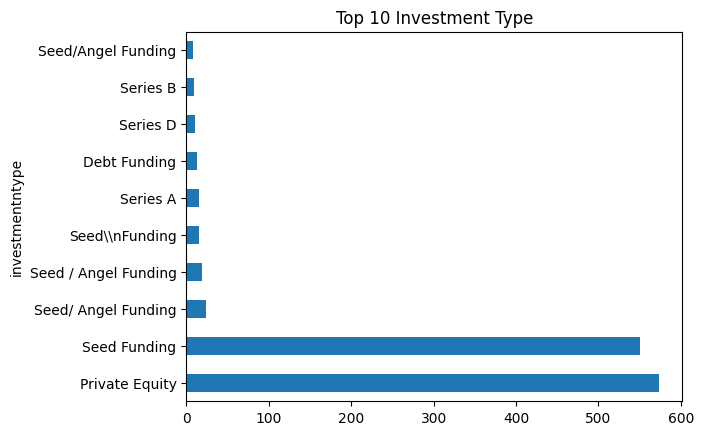

In [103]:
plt.figure()
df['investmentntype'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Investment Type')
plt.show()

In [104]:
import plotly.express as px
total_years=df.groupby('year')['amount_in_usd'].sum().reset_index()
fig = px.pie(
    total_years,
    names='year',   # categorical column
    values='amount_in_usd',   # numeric column
    title='Funding Distribution By Year wise'
)
fig.show()

In [105]:

top_cities=df.groupby('city_location')['startup_name'].count().sort_values(ascending=False).head(5).reset_index()
fig=px.bar(
    top_cities,
    x='city_location',
    y='startup_name',
    title='Top 5 Cities by Number Of Startups',
    labels={'startup_name': 'Number of Startups'}
)
fig.show()

In [106]:
top_cities=df.groupby('city_location')['amount_in_usd'].sum().sort_values(ascending=False).head(10).reset_index()
fig=px.bar(
    top_cities,
    x='city_location',
    y='amount_in_usd',
    title='Top 10 Cities by Funding'
)
fig.show()

In [109]:
industry_funding = (
    df.groupby('industry_vertical')['amount_in_usd']
    .sum()
    .reset_index()
)

fig = px.treemap(
    industry_funding,
    path=['industry_vertical'],
    values='amount_in_usd',
    title='Industry-wise Funding Treemap'
)

fig.show()


In [110]:

total_years=df.groupby('year')['startup_name'].count().reset_index()
fig = px.bar(
    total_years,
    x='year',
    y='startup_name',
    title='Total Startups by Year',
    labels={'startup_name': 'Number of Startups'}
)
fig.show()


In [111]:
top_companies=df.groupby('startup_name')['amount_in_usd'].sum().sort_values(ascending=False).reset_index().head(5)
fig=px.bar(
    top_companies,
    x='startup_name',
    y='amount_in_usd',

    title='Top 5 companies'
)
fig.show()

In [112]:
corr = df[['amount_in_usd', 'year']].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    title='Correlation Heatmap'
)

fig.show()


In [113]:
top_industries = (
    df.groupby('industry_vertical')['amount_in_usd']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# Plot
fig = px.bar(
    top_industries,
    x='industry_vertical',
    y='amount_in_usd',
    title='Top 10 Industries by Funding'
)

fig.show()

In [114]:
top_investors=df.groupby('investors_name')['amount_in_usd'].sum().sort_values(ascending=False).reset_index().head(3)
fig=px.bar(
    top_investors,
    x='investors_name',
    y='amount_in_usd',

    title='Top 3 investors'
)
fig.show()

In [115]:
yearly_funding = df.groupby('year')['amount_in_usd'].sum().sort_values(ascending=False).head(3).reset_index()

fig = px.bar(
    yearly_funding,
    x='year',
    y='amount_in_usd',
    title='Top 3 years ',
   
)

fig.show()


In [116]:

df.to_csv("cleaned_Funding_dataset.csv", index=False)

In [1]:
import sqlite3
import pandas as pd

df = pd.read_csv("cleaned_Funding_dataset.csv")

conn = sqlite3.connect("startup.db")

df.to_sql("startup_fund", conn, if_exists="replace", index=False)

conn.close()

print("Database created successfully!")

Database created successfully!
